---
title: "Decision Tree for record data"
pdf-engine: lualatex
format:
  html:
    theme : Minty
    toc: true
    code-tools: true
    code-fold: true
    code-summary: "Code"
    toc-title: Contents
execute:
    warning: false
---

#### Method Introduction 
1. Data Introduction

    Instagram is very popular nowadays among the world. People in different countries like to use this media platform to share their lives, post some exciting moments and connect with their families and friends. There are some instagram influencers can use the platform to gather likes from their fans, use their popularity to promote some advertisements in order to gain benefits from instagram. This dataset talks about how to measure the influence score among influencers. Here are the column introduction for this dataset. 
    
    channel info: Username in instagram

    influence score: It is calculated based on their popularity.

    posts: total posts they have

    followers: total followers they have

    avg_likes: average likes of their total posts

    60_days_eng_rate: 60 days of engagement rate

    new_post_avg_like: a calculation of the average likes they gained from new posts. 

    total_likes: total likes of their posts in instagram.

    country: users' origin. What countries they from?
    
2. What method am I using for this dataset?

    For this dataset, I am going to use decision tree model which uses a tree-like model of decisions and their possible consequences. It is a useful way to help me to evaluate my options. For this dataset, I want to use decision tree to predict whether the several factors (posts, followers, avg_likes, etc) have the effect on influence score(target). If I have these factors for instagram influencers, can I use decision trees to give a precise predicition for influencer scores among these influencers. I will use decision tree to split a population of data into smaller segments. 



3. Steps for method to process

    Import datasets

        Drop unnecessary columns from the dataset

        Drop NA value rows from the dataset

    Basic data exploration

        I will use y = "influence_score" (output_score) and all other remaining as X (input_feature) matrix. 

    Split Dataset

        I will split dataset into 80% training data and 20% test data to get better prediction for tree model

    Training the model and Testing the results

        Use x_train,y_train to build a model of decision tree

        Evaluate the performance of the decision tree model by using the test data. 

            Generate a confusion matrix plot for decision tree model to evaluate the performance
    
    Build a visulization of the tree

        Decision tree uses a binary tree graph to assign each data sample a target value. I will use tree in sklearn in order to visulize the tree.
    
    Hyper-parameter tuning
    
        The "max_depth" hyper-parameter lets us control the number of layers in our tree.

        Trying to find the lowest training and test error. 

    Re-train the decision tree with optimal model 

        Visulize confusion matrix plots and tree plots
    
    Random Forst Model test and Prediction

#### Step 1: Import dataset

In [1]:
# Read dataset in pd.read_csv and display first several rows.
import pandas as pd
df = pd.read_csv("../data/01-modified-data/instagram_infl.csv")
df = df.drop(['channel_info','country','rank','Unnamed: 0'],axis=1)
df = df.dropna()
df.head()

,influence_score,posts(k),followers(m),X60_day_eng_rate(%),new_post_avg_like(m),total_likes(b),avg_likes
0,92,3.30,475.8,1.39,6.5,29.0,8700000.0
1,91,6.90,366.2,1.62,5.9,57.4,8300000.0
2,90,0.89,357.3,1.24,4.4,6.0,6800000.0
3,93,1.80,342.7,0.97,3.3,11.5,6200000.0
4,91,6.80,334.1,0.20,665.3,12.5,1900000.0


In [2]:
# Print shape and columns of the dataset and describe the dataset
print(df.shape)
print(df.columns)
print(df.describe)

(192, 7)
Index(['influence_score', 'posts(k)', 'followers(m)', 'X60_day_eng_rate(%)',
       'new_post_avg_like(m)', 'total_likes(b)', 'avg_likes'],
      dtype='object')
<bound method NDFrame.describe of      influence_score  posts(k)  followers(m)  X60_day_eng_rate(%)  \
0                 92      3.30         475.8                 1.39   
1                 91      6.90         366.2                 1.62   
2                 90      0.89         357.3                 1.24   
3                 93      1.80         342.7                 0.97   
4                 91      6.80         334.1                 0.20   
..               ...       ...           ...                  ...   
195               71      2.30          33.2                 1.40   
196               81      3.80          33.2                 0.64   
197               79      0.77          33.2                 0.26   
198               78      2.30          33.0                 1.42   
199               80      4.20      

At this time, Because there are too many different scores for influence score, I decided to define influence score as high or low. So I binned the influence score into 0-80 and 80-100. 

In [3]:
bins = [0,80,100]
df['binned'] = pd.cut(df['influence_score'], bins)
df['binned']

0      (80, 100]
1      (80, 100]
2      (80, 100]
3      (80, 100]
4      (80, 100]
         ...    
195      (0, 80]
196    (80, 100]
197      (0, 80]
198      (0, 80]
199      (0, 80]
Name: binned, Length: 192, dtype: category
Categories (2, interval[int64, right]): [(0, 80] < (80, 100]]

Insert code to encode the column infl_score with value between 0 and 1. 1 represents high influence score. 0 represnets low influence score。 Then drop the useless columns which are influence score and binned

In [4]:
# Insert code to encode the column infl_score with value between 0 and 1. 1 represents high influence score. 0 represnets low influence score。 Then drop the useless columns which are influence score and binned
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
df['infl_score'] = lbl.fit_transform(df['binned'])
df = df.drop(['influence_score','binned'],axis=1)

#### Step 2: Basic data exploration

(7, 7)


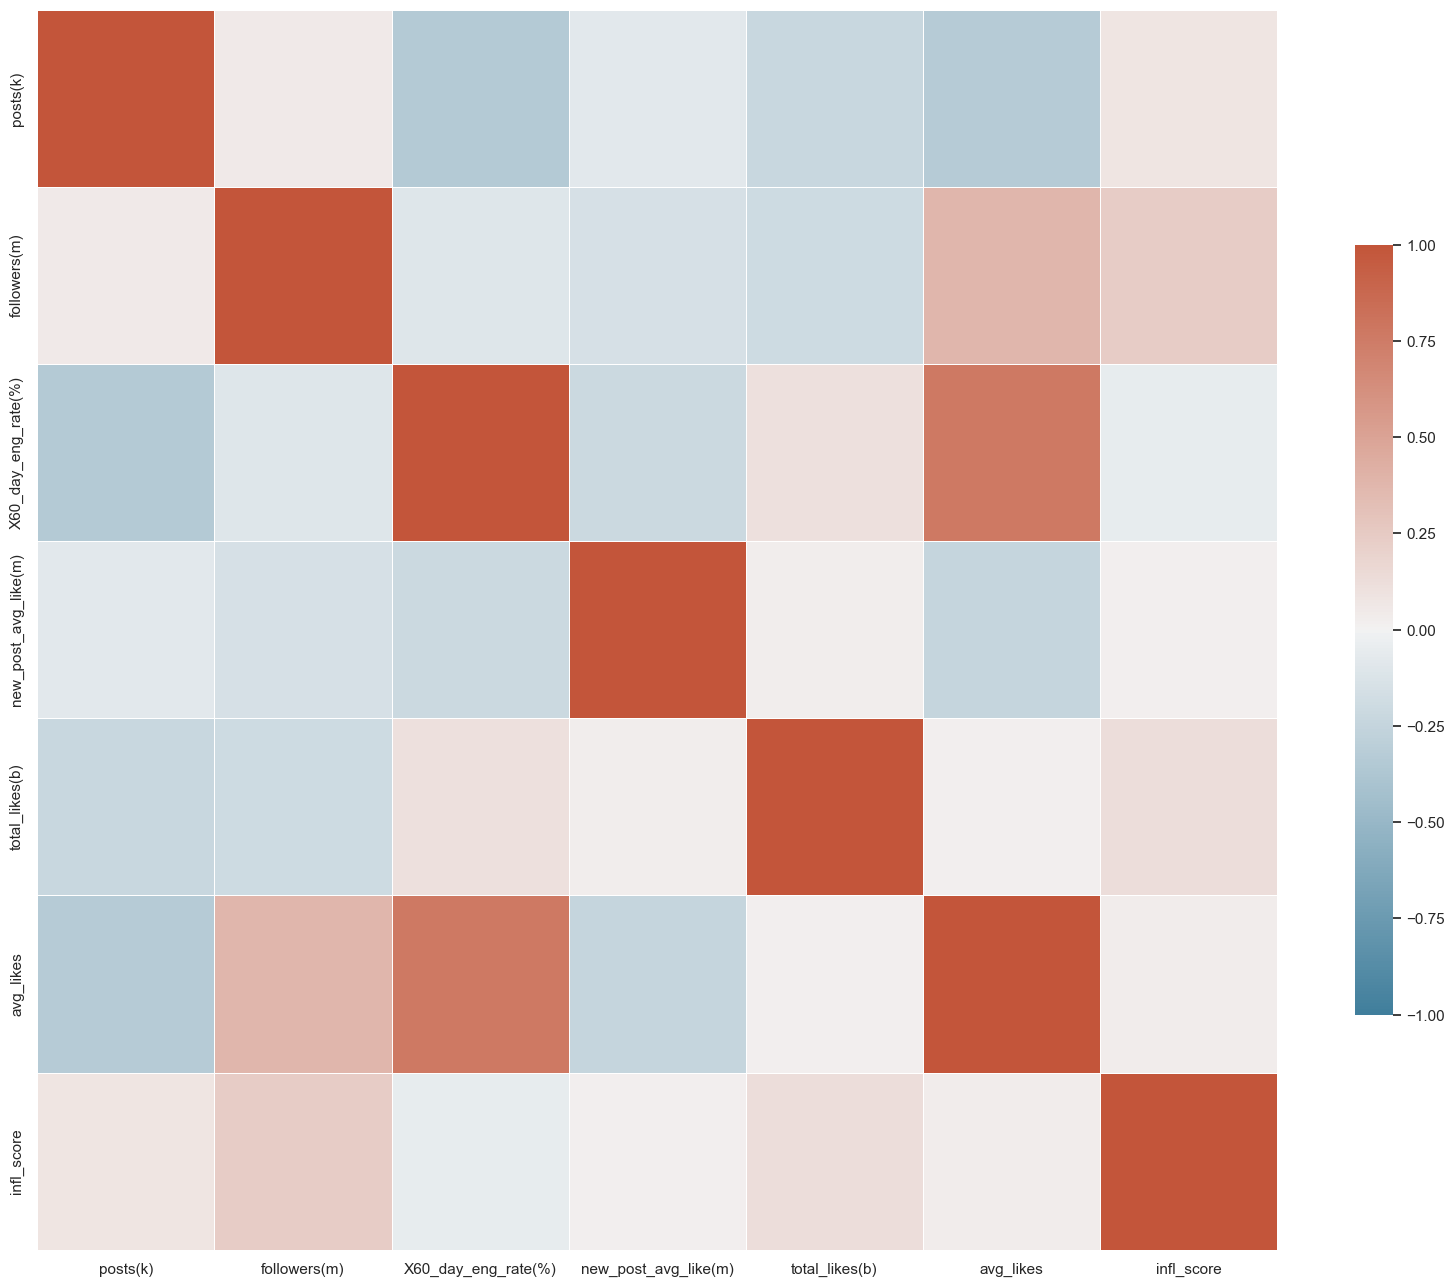

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt
corr = df.corr();  #print(corr)					#COMPUTE CORRELATION OF FEATER MATRIX
print(corr.shape)
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(20, 20))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) 	# Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Insert code to explore the load balance and count the times infl_score = 0 and infl_score = 1

In [6]:
#Insert code to explore the load balance and count the times infl_score = 0 and infl_score = 1
print("Number of points with infl_score=0:",sum(df['infl_score']==0),sum(df['infl_score']==0)/(sum(df['infl_score']==0)+sum(df['infl_score']==1)))
print("Number of points with infl_score=1:",sum(df['infl_score']==1),sum(df['infl_score']==1)/(sum(df['infl_score']==0)+sum(df['infl_score']==1)))

Number of points with infl_score=0: 52 0.2708333333333333
Number of points with infl_score=1: 140 0.7291666666666666


#### Step 3: Isolate the target column and split the dataset
 At this step, I assigned infl_score as the target column and stored it in variable y

 The variable X contains all other features which is excluded from infl_score

 I transfered X to a numpy array

In [7]:
y = df['infl_score']
X = df.drop(['infl_score'],axis=1)

In [8]:
cols = []
for col in X:
    cols.append(col)

In [9]:
X = X.to_numpy()

Insert code to partition datasets into training and testing datasets and print types and shapes of these datasets

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(type(x_train),x_train.shape)
print(type(y_train),y_train.shape)
print(type(x_test),x_test.shape)
print(type(y_test),y_test.shape)
print(y.value_counts())

<class 'numpy.ndarray'> (153, 6)
<class 'pandas.core.series.Series'> (153,)
<class 'numpy.ndarray'> (39, 6)
<class 'pandas.core.series.Series'> (39,)
1    140
0     52
Name: infl_score, dtype: int64


#### Step 4: Training the model

Insert code to use decision tree model in sklearn and train the model on x_train, y_train

In [11]:
# Insert code to use decision tree model in sklearn and train the model on x_train, y_train
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(x_train,y_train)

INSERT CODE TO USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 

In [12]:
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

INSERT CODE TO WRITE A FUNCTION def confusion_plot(y_data,y_pred) WHICH GENERATES A CONFUSION MATRIX PLOT AND PRINTS THE INFORMATION ABOVE 

In [13]:
#INSERT CODE TO WRITE A FUNCTION def confusion_plot(y_data,y_pred) WHICH GENERATES A CONFUSION MATRIX PLOT AND PRINTS THE INFORMATION ABOVE (see link above for example)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import tree
from sklearn.metrics import classification_report
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
def confusion_plot(y_test,yp_test):
    print("ACCURACY:",accuracy_score(y_test,yp_test))
    print("NEGATIVE RECALL (Y=0):",recall_score(y_test, yp_test, pos_label = 0))
    print("NEGATIVE PRECISION (Y=0):",precision_score(y_test,yp_test, pos_label= 0))
    print("POSITIVE RECALL (Y=1):",recall_score(y_test,yp_test))
    print("POSITIVE PRECISION(Y=1):",precision_score(y_test,yp_test))
    print(confusion_matrix(y_test,yp_test))
    ConfusionMatrixDisplay.from_predictions(y_test, yp_test)
    plt.show()

RUN THE FOLLOWING CODE TO TEST YOUR FUNCTION

------TRAINING------
ACCURACY: 1.0
NEGATIVE RECALL (Y=0): 1.0
NEGATIVE PRECISION (Y=0): 1.0
POSITIVE RECALL (Y=1): 1.0
POSITIVE PRECISION(Y=1): 1.0
[[ 39   0]
 [  0 114]]


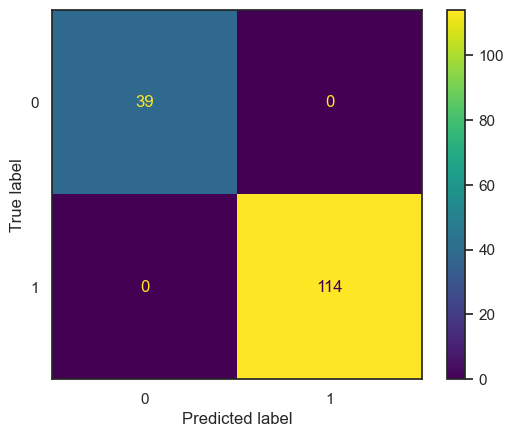

------TEST------
ACCURACY: 0.6666666666666666
NEGATIVE RECALL (Y=0): 0.38461538461538464
NEGATIVE PRECISION (Y=0): 0.5
POSITIVE RECALL (Y=1): 0.8076923076923077
POSITIVE PRECISION(Y=1): 0.7241379310344828
[[ 5  8]
 [ 5 21]]


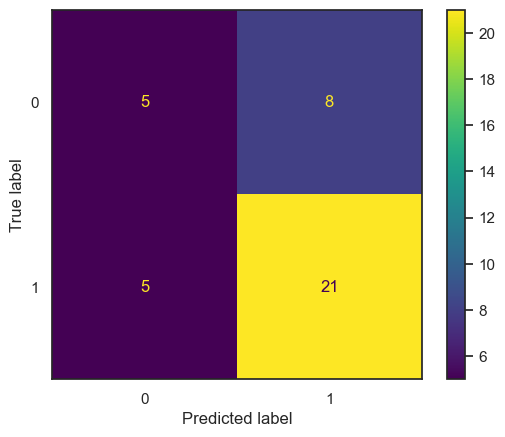

In [14]:
# RUN THE FOLLOWING CODE TO TEST YOUR FUNCTION 
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

Comment: As we can see, as the confusion matrix shows on the plot, The accuracy score is nearly 71.7%, we can conclude that the decision is a fine model to predict this record dataset. Then I want to do some parameter tunning in order to improve the prediction accuracy. 

#### Step 5: Build a visulization of the tree

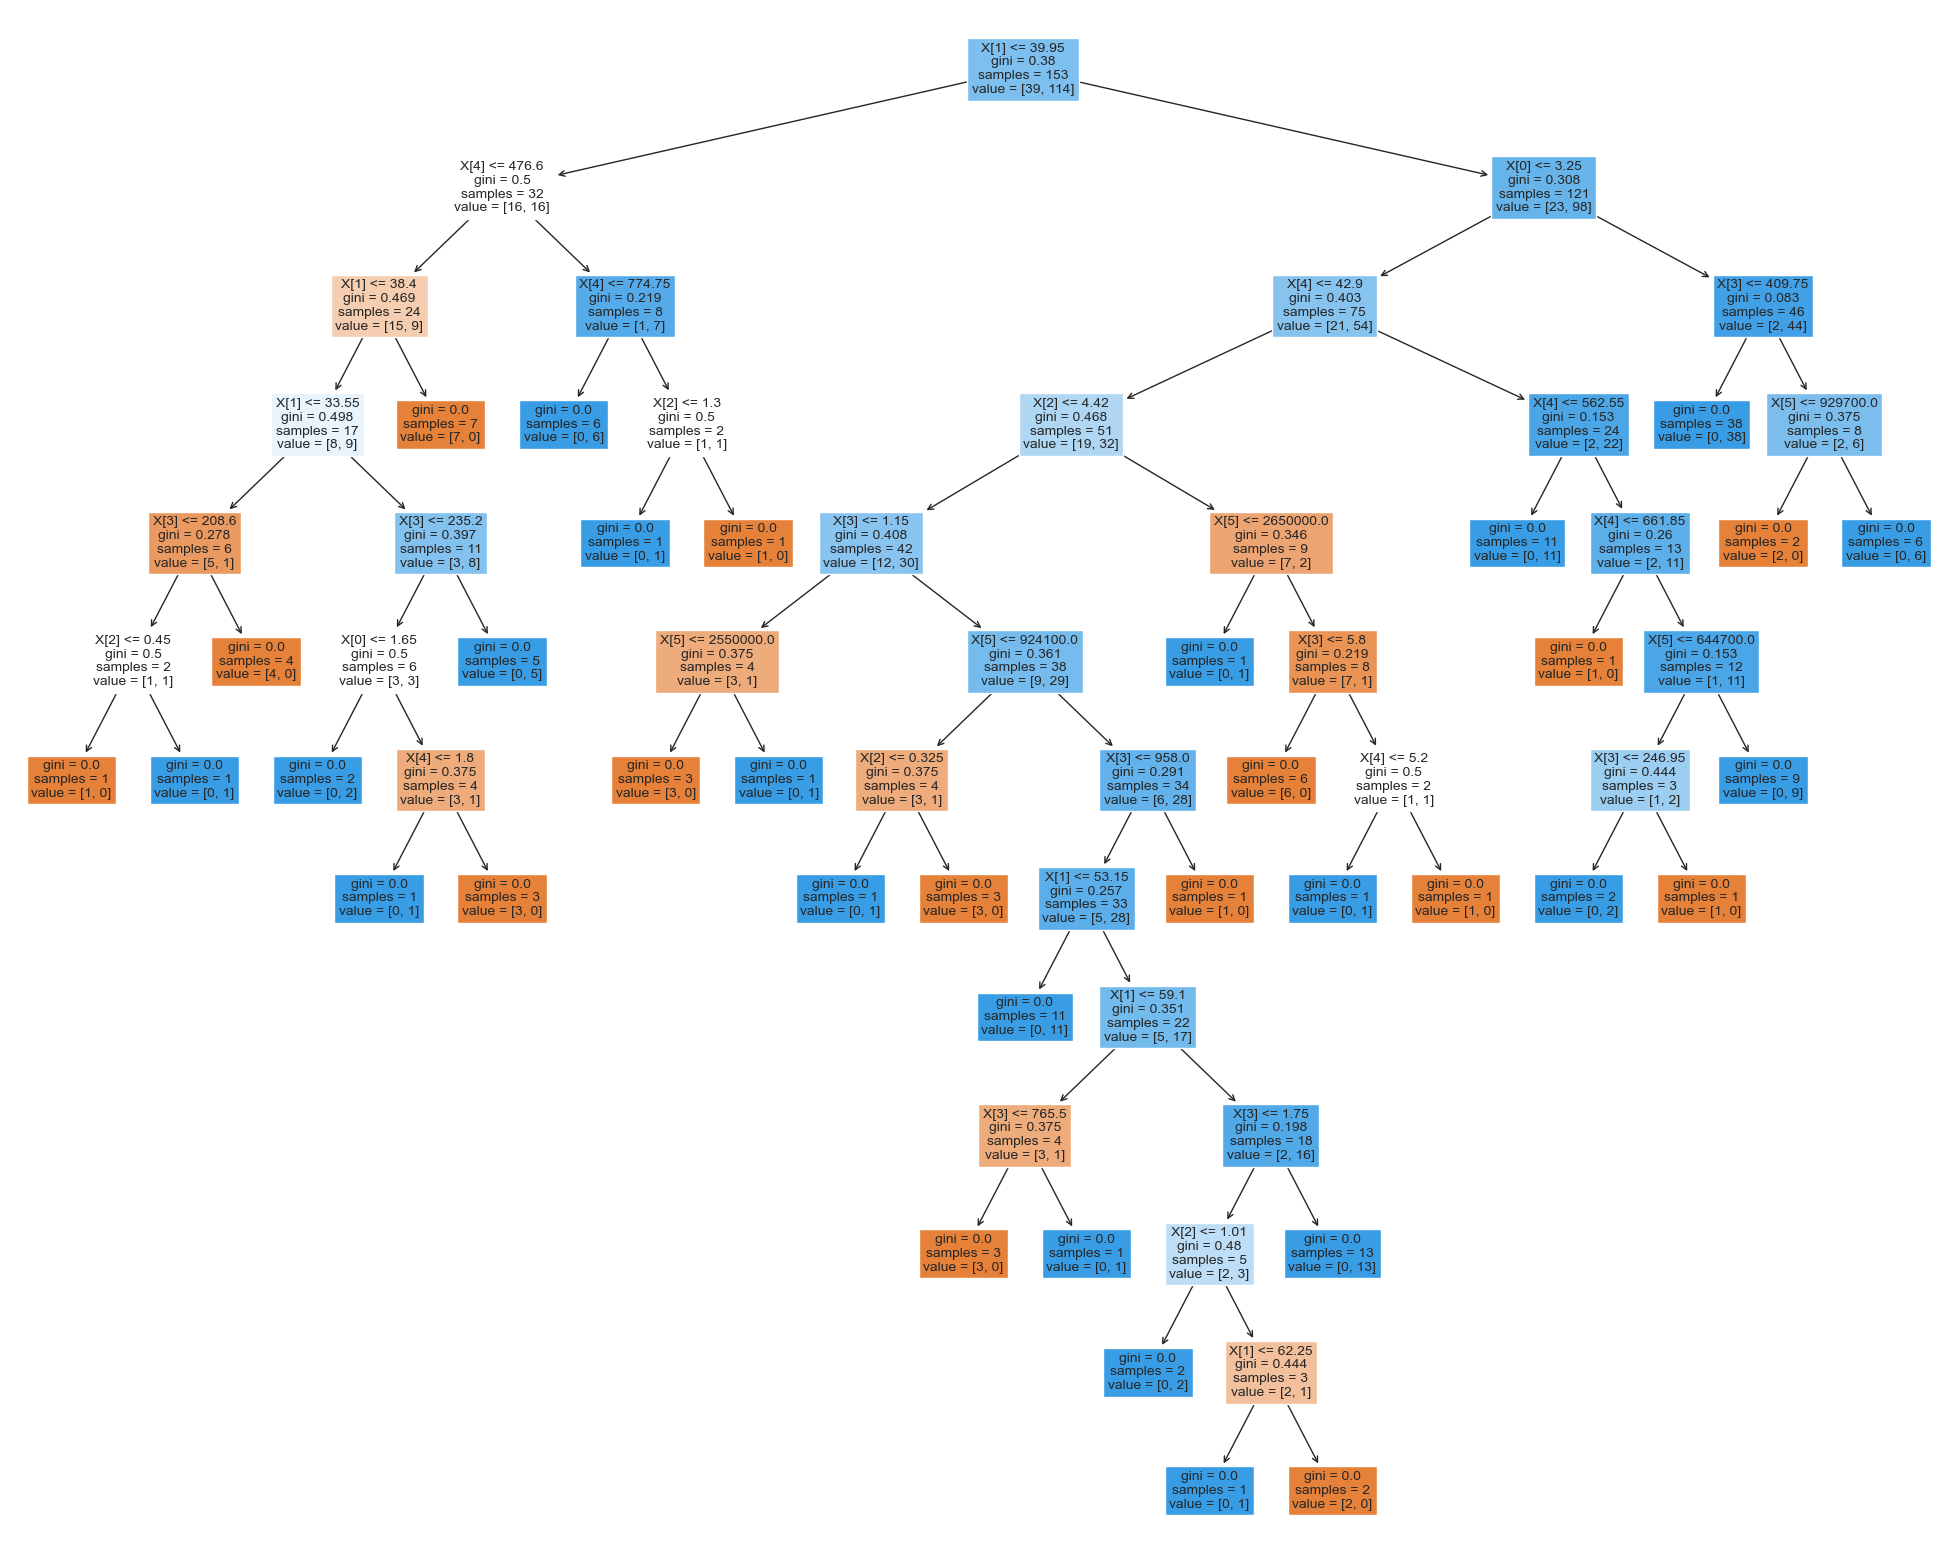

In [15]:
def plot_tree(model,X,Y):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(model,filled=True)
plot_tree(model,X,y)

#### Step 6: Hyper-parameter tunning

    The "max_depth" hyper-parameter lets us control the number of layers in our tree.
    Lets iterate over "max_depth" and try to find the set of hyper-parameters with the lowest training AND test error.

RUN THE FOLLOWING CODE TO LOOP OVER POSSIBLE HYPER-PARAMETERS VALUES

In [16]:

test_results=[]
train_results=[]

for num_layer in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(x_train,y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label=0),recall_score(y_test, yp_test,pos_label=1)])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label=0),recall_score(y_train, yp_train,pos_label=1)])
test_results = pd.DataFrame(test_results)
train_results = pd.DataFrame(train_results)
print(test_results.head())
print(train_results.head())

   0         1         2         3
0  1  0.743590  0.615385  0.807692
1  2  0.692308  0.076923  1.000000
2  3  0.717949  0.153846  1.000000
3  4  0.743590  0.307692  0.961538
4  5  0.692308  0.461538  0.807692
   0         1         2         3
0  1  0.745098  0.410256  0.859649
1  2  0.784314  0.179487  0.991228
2  3  0.790850  0.205128  0.991228
3  4  0.869281  0.564103  0.973684
4  5  0.901961  0.666667  0.982456


INSERT CODE TO GENERATE THE THREE PLOTS BELOW (SEE EXPECTED OUTPUT FOR EXAMPLE)

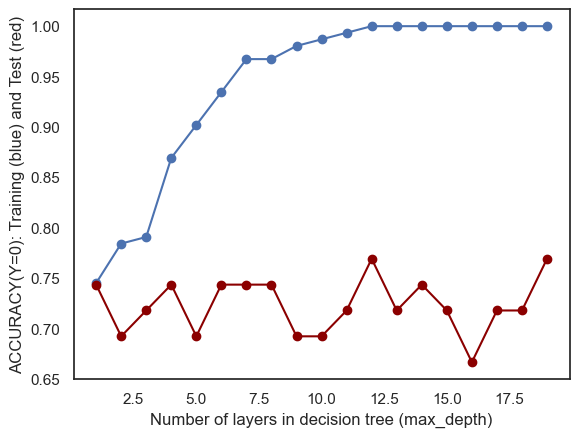

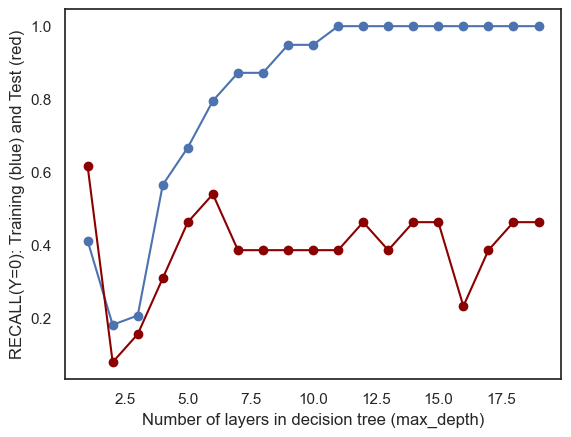

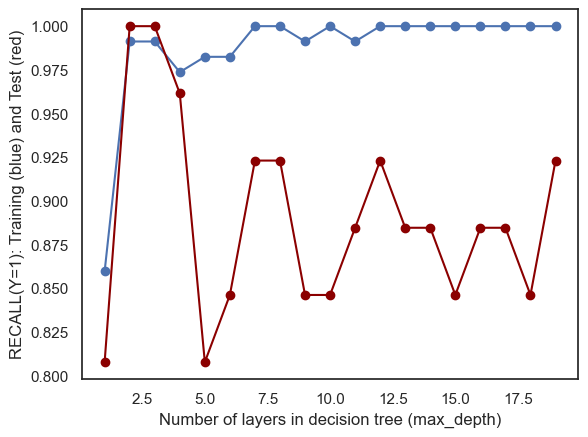

In [17]:
# INSERT CODE TO GENERATE THE THREE PLOTS BELOW (SEE EXPECTED OUTPUT FOR EXAMPLE)

# NOTE: THERE IS A TYPO IN THE THIRD PLOT, IT SHOULD BE RECALL IN THE Y-AXIS LABEL NOT ACCURACY
plt.plot(train_results[0],train_results[1],'-o')
plt.plot(test_results[0],test_results[1],'-o',color = 'darkred')
plt.xlabel("Number of layers in decision tree (max_depth)")
plt.ylabel("ACCURACY(Y=0): Training (blue) and Test (red)")
plt.show()

plt.plot(train_results[0],train_results[2],'-o')
plt.plot(test_results[0],test_results[2],'-o',color = 'darkred')
plt.xlabel("Number of layers in decision tree (max_depth)")
plt.ylabel("RECALL(Y=0): Training (blue) and Test (red)")
plt.show()

plt.plot(train_results[0],train_results[3],'-o')
plt.plot(test_results[0],test_results[3],'-o',color = 'darkred')
plt.xlabel("Number of layers in decision tree (max_depth)")
plt.ylabel("RECALL(Y=1): Training (blue) and Test (red)")
plt.show()

RUN THE CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 

In [18]:
#### COMPLETE THE CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=2)
model = model.fit(x_train,y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

When I assigned max_depth to 2, the accuracy score for test went higher. Within the hyper-parameter tunning, it becomes a more accurate model to predict record dataset. 

   #### Step 7: Re-train the decision tree with optimal model 

RUN THE FOLLOWING CODE TO EVALUATE YOUR MODEL

------TRAINING------
ACCURACY: 0.7843137254901961
NEGATIVE RECALL (Y=0): 0.1794871794871795
NEGATIVE PRECISION (Y=0): 0.875
POSITIVE RECALL (Y=1): 0.9912280701754386
POSITIVE PRECISION(Y=1): 0.7793103448275862
[[  7  32]
 [  1 113]]


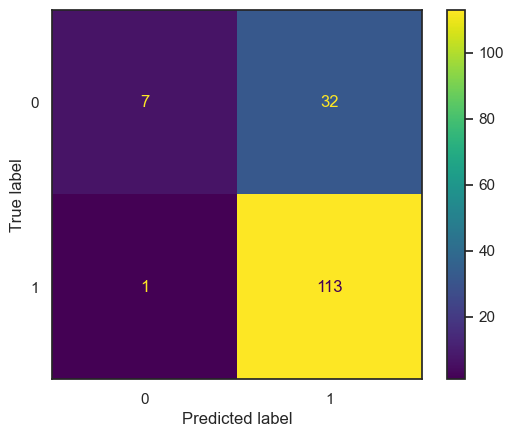

------TEST------
ACCURACY: 0.6923076923076923
NEGATIVE RECALL (Y=0): 0.07692307692307693
NEGATIVE PRECISION (Y=0): 1.0
POSITIVE RECALL (Y=1): 1.0
POSITIVE PRECISION(Y=1): 0.6842105263157895
[[ 1 12]
 [ 0 26]]


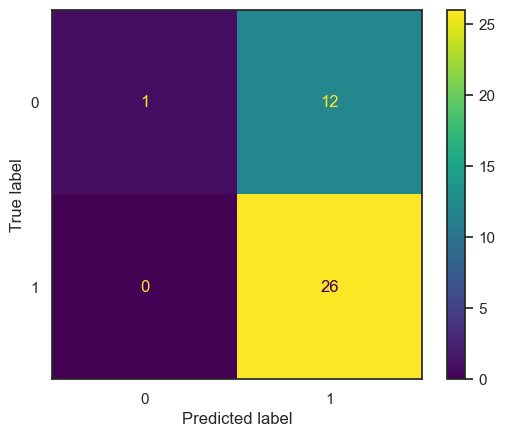

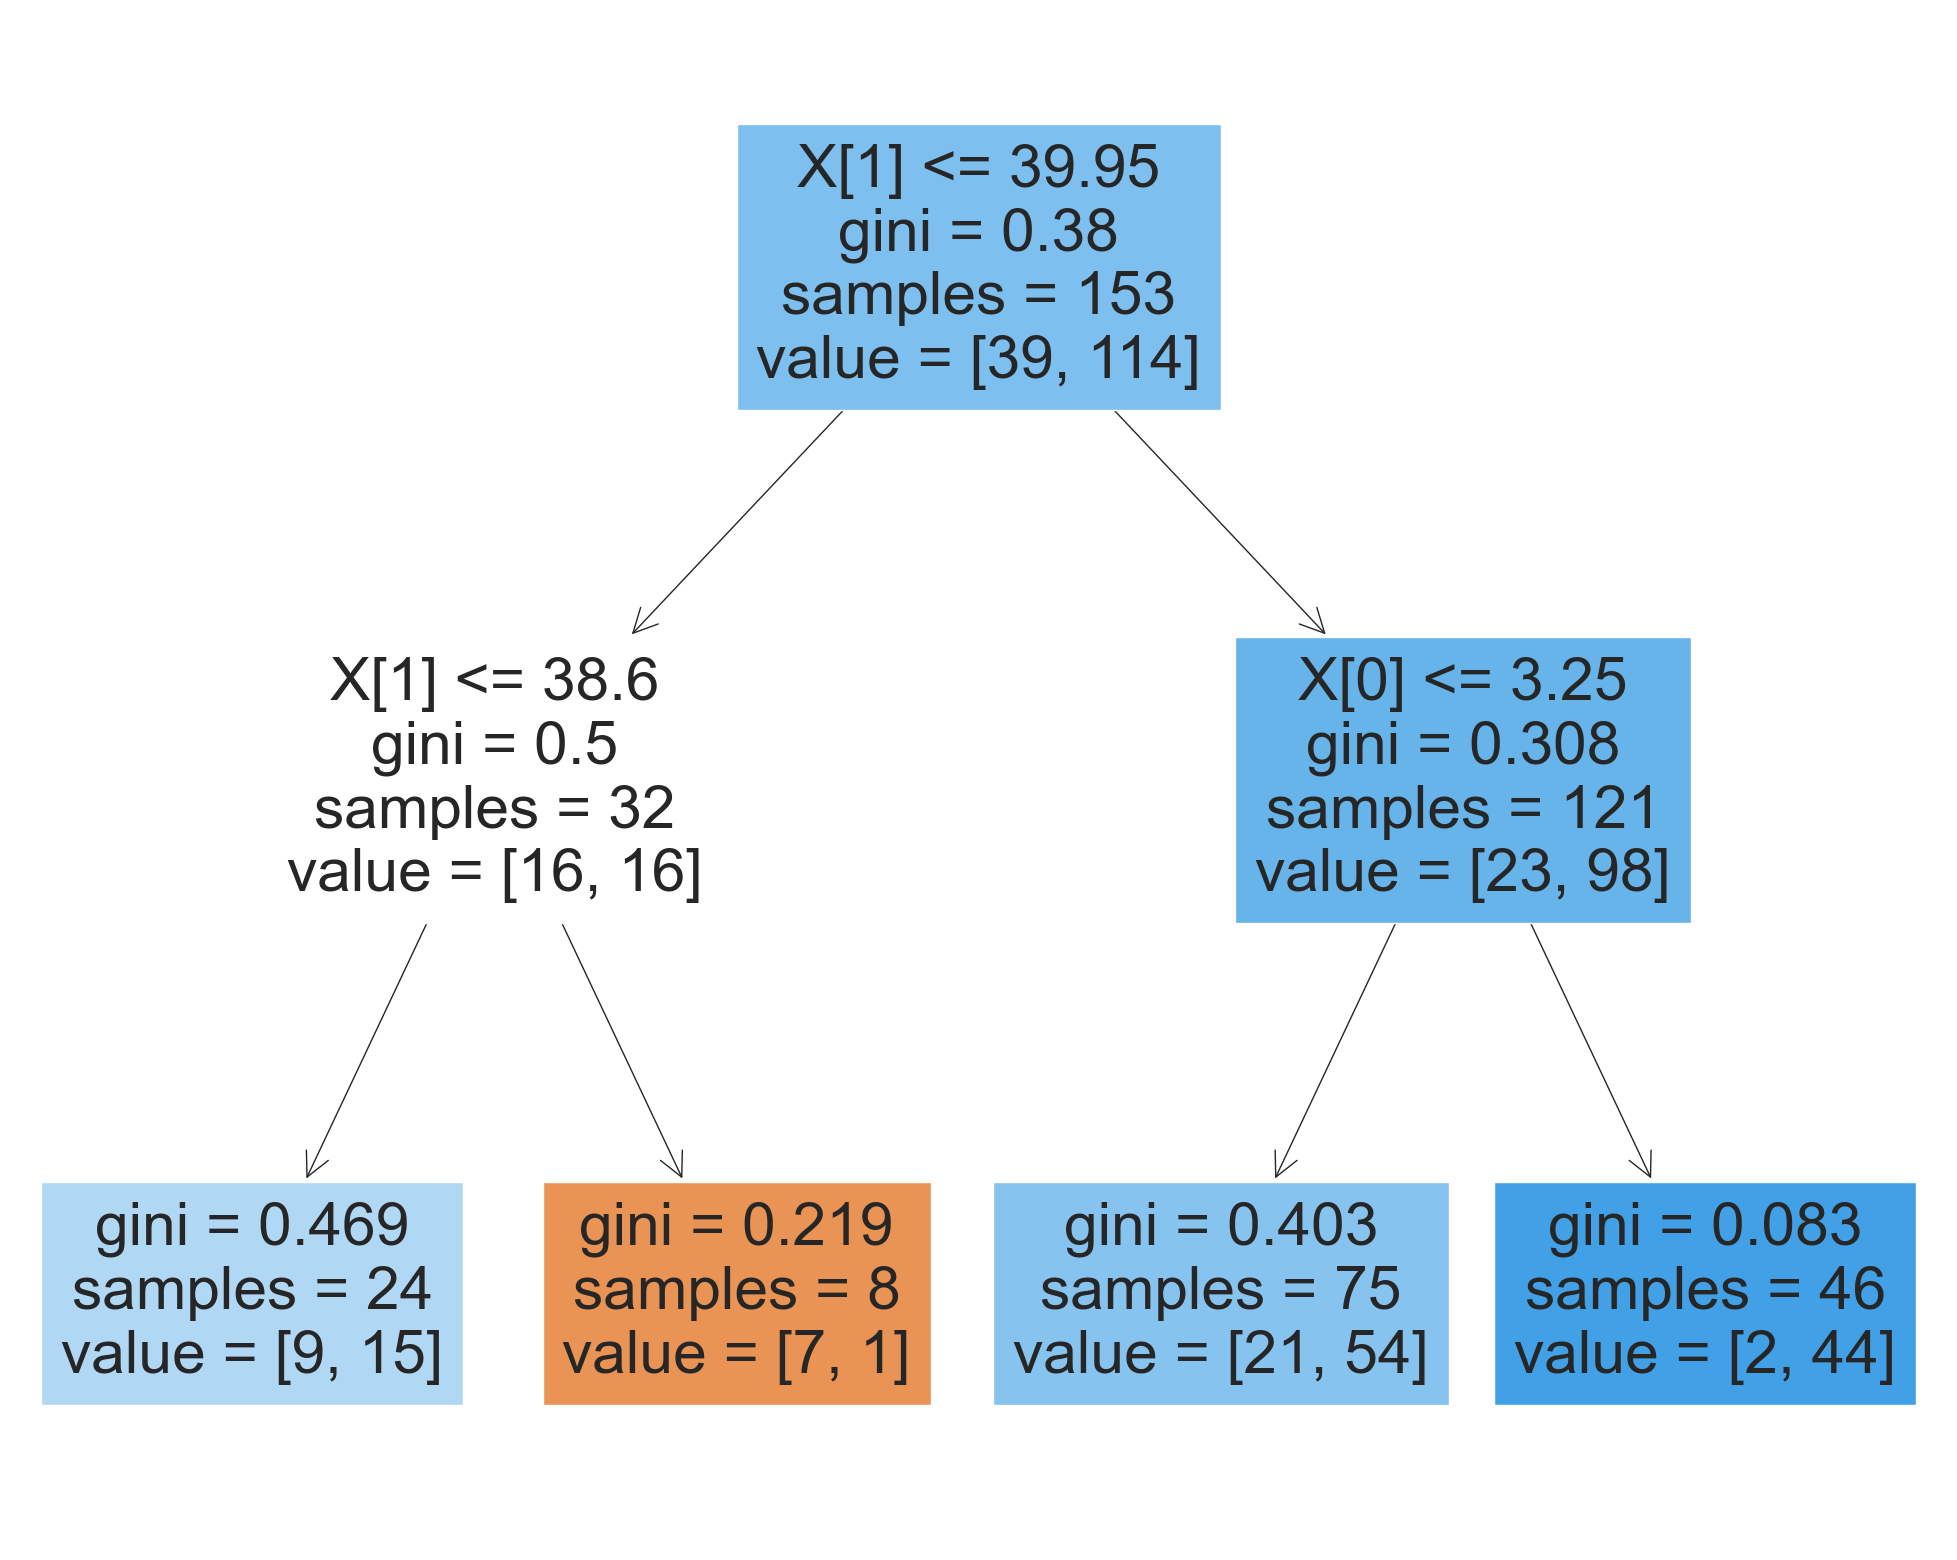

In [19]:
# RUN THE FOLLOWING CODE TO EVALUATE YOUR MODEL
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

plot_tree(model,X,y)

#### Decision Tree model conclusion
    Decision Tree is a decision analysis method for evaluating project risk and judging its feasibility by forming a decision tree to obtain the probability that the expected value of the net present value is greater than or equal to zero on the basis of knowing the probability of occurrence of various situations. A graphical method for intuitive use of probability analysis. Because this kind of decision-making branch is drawn in a graph that resembles the branches of a tree, it is called a decision tree.For the optimal model, I got the acccuracy score which is approximately 77%. We can conclude that it is a good model to predict the record data. More than this, Within the max_depth is assigned to 2, we can conclude that the most important for feature is X[1] which is the number of followers, then the decision tree went through to calculate the features X[0] and X[4] which are the number of posts and the number of total likes. Within the feature selection, we can conclude that these three features are highly correlated to determine the influence scores. I would like to find more on random forest model in the following. 

#### Random Forest Classification
Random forests or random decision forests are ensemble learning methods for classification, regression, and other tasks that operate by building multiple decision trees at training time and outputting the classes as patterns of classes (classification) or average predictions (regression). individual trees. Random decision forests correct the habit of decision trees to overfit their training set.
 In this step, I plan to build and evaluate a model for random forest, then calculate the feature importance of random forest. 

Instantiate and fit the RandomForestClassifier

In [20]:
# Instantiate and fit the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
yp_train = forest.predict(x_train)
yp_test = forest.predict(x_test)

In [21]:
accuracy_score(y_test, yp_test)

0.717948717948718

 TEST MY FUNCTION

------TRAINING------
ACCURACY: 1.0
NEGATIVE RECALL (Y=0): 1.0
NEGATIVE PRECISION (Y=0): 1.0
POSITIVE RECALL (Y=1): 1.0
POSITIVE PRECISION(Y=1): 1.0
[[ 39   0]
 [  0 114]]


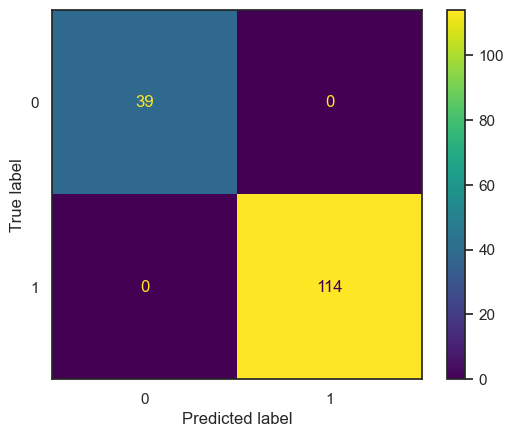

              precision    recall  f1-score   support

           0       0.62      0.38      0.48        13
           1       0.74      0.88      0.81        26

    accuracy                           0.72        39
   macro avg       0.68      0.63      0.64        39
weighted avg       0.70      0.72      0.70        39

------TEST------
ACCURACY: 0.717948717948718
NEGATIVE RECALL (Y=0): 0.38461538461538464
NEGATIVE PRECISION (Y=0): 0.625
POSITIVE RECALL (Y=1): 0.8846153846153846
POSITIVE PRECISION(Y=1): 0.7419354838709677
[[ 5  8]
 [ 3 23]]


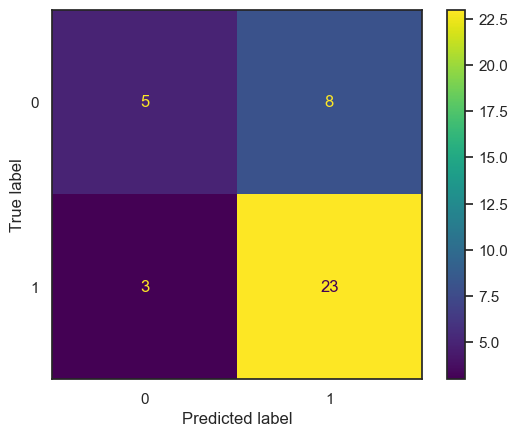

              precision    recall  f1-score   support

           0       0.62      0.38      0.48        13
           1       0.74      0.88      0.81        26

    accuracy                           0.72        39
   macro avg       0.68      0.63      0.64        39
weighted avg       0.70      0.72      0.70        39



In [22]:
# RUN THE FOLLOWING CODE TO TEST YOUR FUNCTION 
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print(classification_report(y_test, yp_test))
print("------TEST------")
confusion_plot(y_test,yp_test)
print(classification_report(y_test, yp_test))

##### built-in feature importance
    We can measure how each feature decrease the impurity of the split (the feature with highest decrease is selected for internal node). For each feature we can collect how on average it decreases the impurity. The average over all trees in the forest is the measure of the feature importance. 

Text(0.5, 0, 'Random Forest Feature Importance')

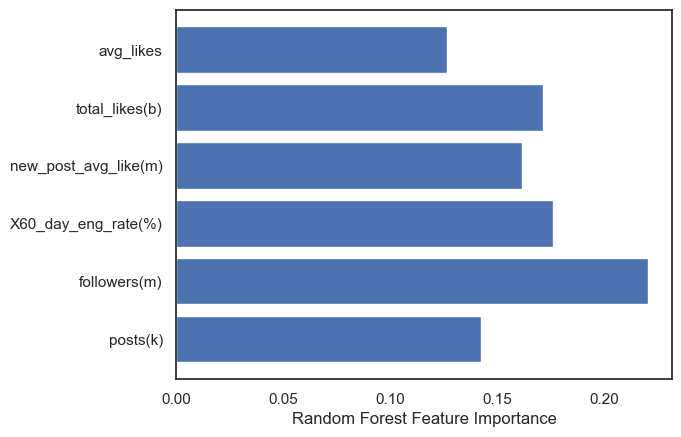

In [23]:
plt.barh(cols, forest.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

##### Permutation Based Feature Importance
    The permutation based importance can be used to overcome drawbacks of default feature importance computed with mean impurity decrease. This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.

Text(0.5, 0, 'Permutation Importance')

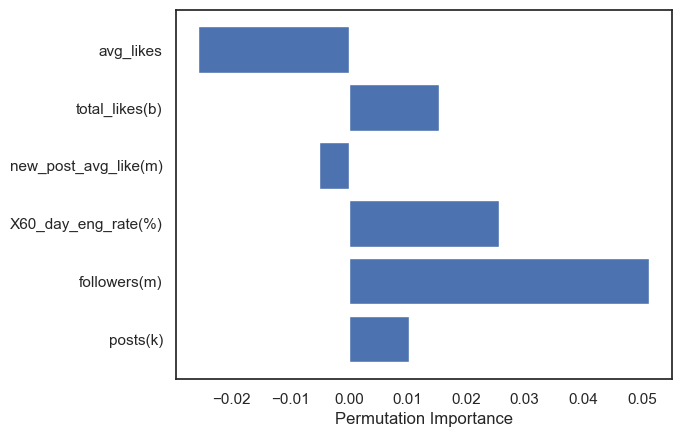

In [24]:
perm_importance = permutation_importance(forest, x_test, y_test)
plt.barh(cols, perm_importance.importances_mean)
plt.xlabel("Permutation Importance")

##### Conclusion
    As the confusion matrix showed in  random forest model, the accuracy is above 74%, which is a good model for predict instagram influencers' dataset. I used two ways to compute the feature importance:

        1. built-in feature importance

        2. permutation based importance

    In my opinion, it is always good to check both methods to overcome the other's drawback. From the plot, we can conclude that followers are the most important features to determine the influence scores. X60_day_eng_rate is the second important feature to determine the influence scores. Posts in built-in feature importance is high but in permutation is low. But from the decision tree and random forest from all over this page, the infleunce scores are highly determined by followers. The numbder of followers is one of the most important factors to determine the influence score. 

#### Reference
Wikimedia Foundation. (2022, October 23). Decision tree. Wikipedia. Retrieved December 3, 2022, from https://en.wikipedia.org/wiki/Decision_tree 